In [25]:
import json
import os
from collections import Counter
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [26]:
! pip install trueskill

In [27]:
! pip install prettyplotlib

In [39]:
input_dir = "/home/hannw/repos/kaggle-environments/experiments/repeated_8player_blocked_unique_20250731"
blocks = []

for i in range(10):
    dir_path = os.path.join(input_dir, f"block{i}")
    games = []
    for j in range(8):
        fpath = os.path.join(dir_path, f"game{j}.json")
        games.append(json.load(open(fpath)))
    blocks.append(games)


In [40]:
winner_count = Counter(wid for block in blocks for game in block for wid in game['info'].get('GAME_END', {}).get('winner_ids'))

In [41]:
n_games = 0
winner_list = []
winners_list = []
losers_list = []
winner_team = []
for block in blocks:
    for game in block:
        info = game['info']
        if 'GAME_END' in info:
            if 'winner_ids' in info['GAME_END']:
                n_games += 1
                winner_list.extend(info['GAME_END']['winner_ids'])
                winners_list.append(info['GAME_END']['winner_ids'])
                losers_list.append(info['GAME_END']['loser_ids'])
                winner_team.append(info['GAME_END']['winner_team'])
counts = Counter(winner_list)
team_counts = Counter(winner_team)
win_rate = {k: v / n_games for k, v in counts.items()}
team_win_rate = {k: v / n_games for k, v in team_counts.items()}


## Win rate

In [42]:
s = pd.Series(win_rate)
df = pd.DataFrame({'win_rate': s})
df['rank'] = df['win_rate'].rank(ascending=False).astype(int)
df = df.sort_values('rank', ascending=True)
display(df)

,win_rate,rank
gpt-4.1,0.4375,1
deepseek-r1,0.4125,2
gemini-2.5-pro,0.3875,3
claude-4-opus,0.3625,4
qwen3,0.3375,5
grok-4,0.3375,5
o4-mini,0.3125,7
kimi-k2,0.2625,8


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by win_rate
df = df.sort_values(by='win_rate', ascending=False)
df['Model'] = df.index

# Create the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    x='win_rate',
    y='Model',
    data=df,
    palette='viridis'
)

# Add data labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=12, padding=5)

# Set titles and labels
plt.title('Model Win Rates', fontsize=20, fontweight='bold')
plt.xlabel('Win Rate', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Customize the plot
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Save the plot
plt.savefig('model_win_rate_barplot.png', dpi=300)

/var/tmp/ipykernel_1750268/1444478657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


In [44]:
plt.bar(df.index, df['win_rate'])

<BarContainer object of 8 artists>

## TrueSkill of winning werewolf

In [45]:
from trueskill import Rating, quality, rate

In [46]:
rates = {pid: Rating() for pid in winners_list[0] + losers_list[0]}

for winners, losers in zip(winners_list, losers_list):
    winner_ratings = [rates[pid] for pid in winners]
    loser_ratings = [rates[pid] for pid in losers]
    print('{:.1%} chance to draw'.format(quality([winner_ratings, loser_ratings])))
    new_winner_ratings, new_loser_ratings = rate([winner_ratings, loser_ratings], ranks=[0, 1])
    for pid, r in zip(winners, new_winner_ratings):
        rates[pid] = r
    for pid, r in zip(losers, new_loser_ratings):
        rates[pid] = r

print(rates)


0.0% chance to draw
0.0% chance to draw
0.0% chance to draw
3.7% chance to draw
0.0% chance to draw
2.8% chance to draw
0.3% chance to draw
0.5% chance to draw
47.8% chance to draw
1.4% chance to draw
56.1% chance to draw
57.2% chance to draw
29.1% chance to draw
58.6% chance to draw
5.3% chance to draw
54.2% chance to draw
60.0% chance to draw
56.5% chance to draw
15.3% chance to draw
35.7% chance to draw
59.8% chance to draw
50.5% chance to draw
66.8% chance to draw
27.2% chance to draw
67.5% chance to draw
49.8% chance to draw
56.4% chance to draw
66.7% chance to draw
29.7% chance to draw
44.9% chance to draw
40.6% chance to draw
28.9% chance to draw
54.3% chance to draw
25.6% chance to draw
59.8% chance to draw
69.2% chance to draw
46.0% chance to draw
22.1% chance to draw
51.1% chance to draw
75.8% chance to draw
11.7% chance to draw
74.0% chance to draw
29.6% chance to draw
4.9% chance to draw
62.1% chance to draw
18.5% chance to draw
66.4% chance to draw
78.9% chance to draw
70.

In [47]:
from typing import Dict

def get_ranked_skill_df(win_rate: Dict):
    df = pd.DataFrame(win_rate, index=['mu', 'sigma']).transpose().sort_values('mu', ascending=False)
    df['rank'] = df['mu'].rank(ascending=False).astype(int)
    return df

In [48]:
df = get_ranked_skill_df(rates)

display(df)

,mu,sigma,rank
gpt-4.1,4.058269,2.460461,1
deepseek-r1,0.025822,2.460461,2
gemini-2.5-pro,-2.551308,2.460461,3
claude-4-opus,-2.875099,2.460461,4
o4-mini,-6.261705,2.460461,5
qwen3,-6.840577,2.460461,6
grok-4,-7.648368,2.460461,7
kimi-k2,-11.350012,2.460461,8


In [80]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt

matplotlib.font_manager.get_font('/home/hannw/repos/kaggle-environments/assets/helvetica-255/Helvetica-Bold.ttf')
matplotlib.font_manager.get_font('/home/hannw/repos/kaggle-environments/assets/arial/Arial.ttf')
matplotlib.font_manager.list_fonts('/home/hannw/repos/kaggle-environments/assets/arial','ttf')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Arial']

In [81]:
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/texmf/fonts/opentype/public/lm/lmmono9-regular.otf',
 '/usr/share/fonts/arial/ARIALBD.TTF',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromanslant17-regular.otf',
 '/usr/share/fonts/truetype/lato/Lato-Thin.ttf',
 '/usr/share/fonts/arial/ARIALNB.TTF',
 '/usr/share/fonts/arial/ARIALN.TTF',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromanslant10-regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoltcond10-oblique.otf',
 '/usr/share/fonts/arial/arialceb.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm-math/latinmodern-math.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono8-regular.otf',
 '/usr/share/fonts/arial/ARIALBD 1.TTF',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans10-oblique.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman6-regular.otf',
 '/usr/share/fonts/arial/ARIALNI.TTF',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans17-regular.otf',
 '/usr/share/fonts/truetype/la

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

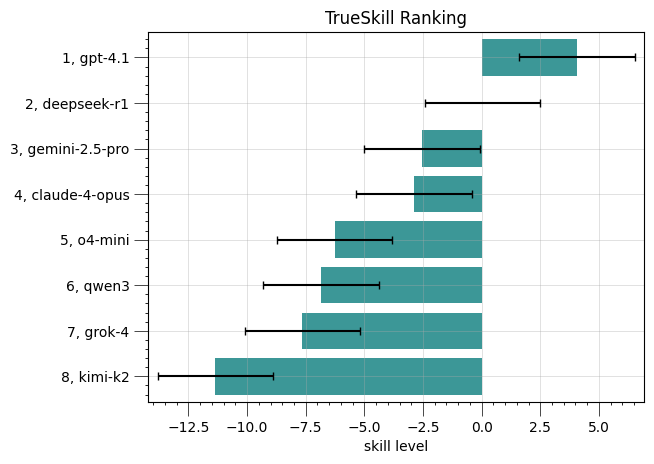

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from typing import Dict

from aquarel import load_theme


df = get_ranked_skill_df(rates)

df = df.sort_values(by='mu', ascending=True)
df['Model'] = df.index

with load_theme("boxy_light"):
    plt.barh([f"{i}, {name}" for i, name in zip(df['rank'], df['Model'])], df['mu'], xerr=df['sigma'], ecolor='black', capsize=3, linewidth=3, error_kw={'marker': 's'})
    plt.xlabel('skill level')
    plt.ylabel('')
    plt.title('TrueSkill Ranking')
    plt.show()

Learnings:
1. Intelligence/reasoning depth does not directly correlate with higher rank.
2. 80 games is still not quite sufficient to converge on stable ranking.

In [ ]:
ranks = [10, 16, 2, 6, 15, 5, 5, 6]

In [1]:
4 / 2.46

1.6260162601626016

In [ ]:



df = pd.DataFrame(list(win_rate.items()), columns=['Model', 'Win Rate']).sort_values('Win Rate', ascending=False)
df

,Model,Win Rate
1,gpt-4.1,0.4375
4,deepseek-r1,0.4125
2,gemini-2.5-pro,0.3875
0,claude-4-opus,0.3625
3,qwen3,0.3375
6,grok-4,0.3375
7,o4-mini,0.3125
5,kimi-k2,0.2625


In [10]:
team_df = pd.DataFrame(list(team_win_rate.items()), columns=['team', 'win rate']).sort_values('win rate', ascending=False)
team_df

,team,win rate
1,Werewolves,0.7875
0,Villagers,0.2125


In [13]:
blocks[0][0]['info']['GAME_END']

{'all_players': [{'agent': {'agent_harness_name': 'llm_harness',
    'agent_id': 'llm_harness/claude-4-opus-20250514',
    'display_name': 'claude-4-opus-20250514',
    'id': 'claude-4-opus',
    'llms': [{'model_name': 'claude-4-opus-20250514', 'properties': {}}],
    'role': 'Villager',
    'thumbnail': 'https://images.seeklogo.com/logo-png/55/1/claude-logo-png_seeklogo-554534.png'},
   'alive': True,
   'eliminated_during_day': -1,
   'eliminated_during_phase': None,
   'id': 'claude-4-opus',
   'role': {'descriptions': 'A member of the Villagers team. Has no special abilities other than their vote during the day.',
    'name': 'Villager',
    'night_priority': 100,
    'team': 'Villagers'}},
  {'agent': {'agent_harness_name': 'llm_harness',
    'agent_id': 'llm_harness/gpt-4.1',
    'display_name': 'gpt-4.1',
    'id': 'gpt-4.1',
    'llms': [{'model_name': 'gpt-4.1', 'properties': {}}],
    'role': 'Villager',
    'thumbnail': 'https://images.seeklogo.com/logo-png/46/1/chatgpt-log

In [14]:
blocks[0][0]['info']['GAME_END']['all_players'][0]['eliminated_during_day']

-1

In [ ]:
for block in blocks:
    for game in block:
        for player in game['info']['GAME_END']['all_players']:
            pid = player['id']
            died_at = player['eliminated_during_day']

## Survival Skill of each player

In [87]:
from typing import Dict

def get_ranked_skill_df(win_rate: Dict):
    df = pd.DataFrame(win_rate, index=['mu', 'sigma']).transpose().sort_values('mu', ascending=False)
    df['rank'] = df['mu'].rank(ascending=False).astype(int)
    return df

### Without controlling for first day kill

First, we try to rank skill based on survival skill purely by measuring length of survival. Last day surviver, winner team ranks higher than loser team.

In [88]:
def rank_survival_pure(elim_list, winner_team):
    max_day_winner_team = 1000
    max_day_loser_team = 900
    day_dict = {}
    for item in elim_list:
        name = item['player_id']
        if item['eliminated_during_day'] == -1:
            if name in winner_team:
                day = max_day_winner_team
            else:
                day = max_day_loser_team
        else:
            day = item['eliminated_during_day']
            day += 0.5 if item['eliminated_during_phase'] == 'Night' else 0
        day_dict.setdefault(day, [])
        day_dict[day].append(name)
    day_list = list(day_dict.items())
    day_list.sort(key=lambda x: x[0], reverse=True)
    rank_list = [(i, names) for i, (day, names) in enumerate(day_list)]
    return rank_list

In [89]:
from trueskill import Rating, quality, rate

surv_rates = {pid: Rating() for pid in winners_list[0] + losers_list[0]}

for block in blocks:
    for game in block:
        info = game['info']
        rank_list = rank_survival_pure(info['GAME_END']['elimination_info'], info['GAME_END']['winner_ids'])
        ratings_list = []
        ranks = []
        for rank, names in rank_list:
            ratings_list.append([surv_rates[name] for name in names])
            ranks.append(rank)
        new_ratings = rate(ratings_list, ranks=ranks)
        for new_rating, (rank, names) in zip(new_ratings, rank_list):
            for new_rate_temp, name in zip(new_rating, names):
                surv_rates[name] = new_rate_temp

df = get_ranked_skill_df(surv_rates)
display(df)

,mu,sigma,rank
qwen3,26.851051,0.820917,1
deepseek-r1,26.668412,0.802094,2
kimi-k2,25.794528,0.752775,3
gemini-2.5-pro,25.594579,0.801547,4
gpt-4.1,25.357653,0.794844,5
o4-mini,24.920195,0.762513,6
grok-4,24.768855,0.747811,7
claude-4-opus,24.563342,0.782162,8


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

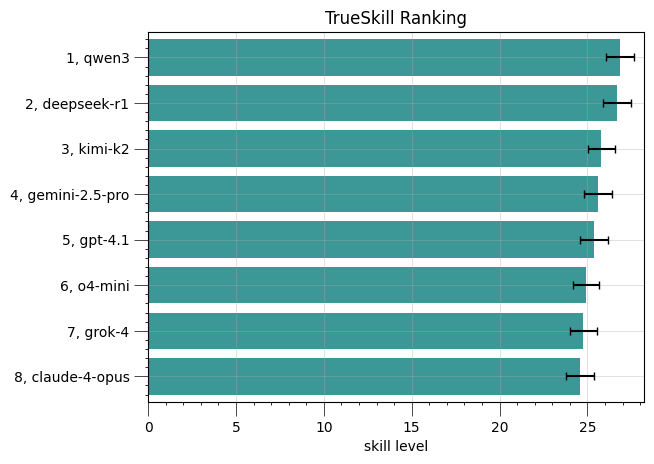

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from typing import Dict

from aquarel import load_theme

df = df.sort_values(by='mu', ascending=True)
df['Model'] = df.index

with load_theme("boxy_light"):
    plt.barh([f"{i}, {name}" for i, name in zip(df['rank'], df['Model'])], df['mu'], xerr=df['sigma'], ecolor='black', capsize=3, linewidth=3, error_kw={'marker': 's'})
    plt.xlabel('skill level')
    plt.ylabel('')
    plt.title('TrueSkill Ranking')
    plt.show()

In [91]:
# info['GAME_END']['elimination_info']
from typing import Dict

# Noteablly, we control for first day killing, since it is not correlated with skill (it may be purely random elimination

def rank_survival(elim_list, winner_team):
    max_day_winner_team = 1000
    max_day_loser_team = 900
    day_dict = {}
    for item in elim_list:
        name = item['player_id']
        if item['eliminated_during_day'] == -1:
            if name in winner_team:
                day = max_day_winner_team
            else:
                day = max_day_loser_team
        elif item['eliminated_during_day'] == 0 and item['eliminated_during_phase'] == 'Night':
            continue
        else:
            day = item['eliminated_during_day']
            day += 0.5 if item['eliminated_during_phase'] == 'Night' else 0
        day_dict.setdefault(day, [])
        day_dict[day].append(name)
    day_list = list(day_dict.items())
    day_list.sort(key=lambda x: x[0], reverse=True)
    rank_list = [(i, names) for i, (day, names) in enumerate(day_list)]
    return rank_list

rank_survival(info['GAME_END']['elimination_info'], info['GAME_END']['winner_ids'])
    


[(0, ['qwen3', 'gpt-4.1']),
 (1, ['o4-mini', 'gemini-2.5-pro']),
 (2, ['kimi-k2']),
 (3, ['deepseek-r1']),
 (4, ['grok-4'])]

In [92]:
# compute survival skill ranking

from trueskill import Rating, quality, rate

surv_rates = {pid: Rating() for pid in winners_list[0] + losers_list[0]}

for block in blocks:
    for game in block:
        info = game['info']
        rank_list = rank_survival(info['GAME_END']['elimination_info'], info['GAME_END']['winner_ids'])
        ratings_list = []
        ranks = []
        for rank, names in rank_list:
            ratings_list.append([surv_rates[name] for name in names])
            ranks.append(rank)
        new_ratings = rate(ratings_list, ranks=ranks)
        for new_rating, (rank, names) in zip(new_ratings, rank_list):
            for new_rate_temp, name in zip(new_rating, names):
                surv_rates[name] = new_rate_temp
df = get_ranked_skill_df(surv_rates)
display(df)

,mu,sigma,rank
gpt-4.1,27.983109,0.930279,1
deepseek-r1,27.061471,0.864416,2
qwen3,26.774388,0.866383,3
gemini-2.5-pro,26.307359,0.885568,4
claude-4-opus,25.268997,0.879639,5
kimi-k2,24.645258,0.802025,6
o4-mini,23.931914,0.807092,7
grok-4,22.347354,0.808434,8


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

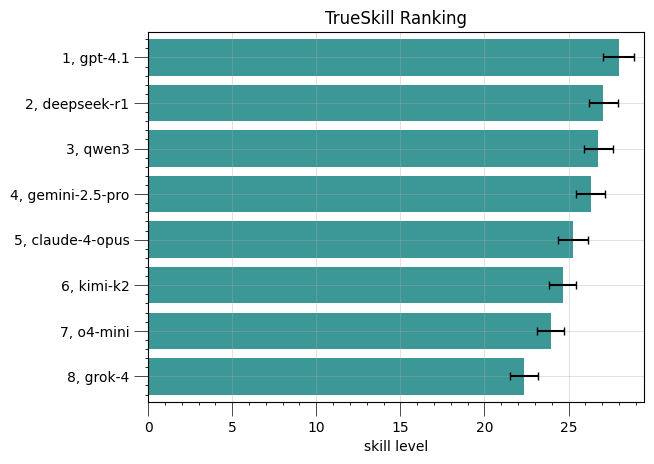

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from typing import Dict

from aquarel import load_theme

df = df.sort_values(by='mu', ascending=True)
df['Model'] = df.index

with load_theme("boxy_light"):
    plt.barh([f"{i}, {name}" for i, name in zip(df['rank'], df['Model'])], df['mu'], xerr=df['sigma'], ecolor='black', capsize=3, linewidth=3, error_kw={'marker': 's'})
    plt.xlabel('skill level')
    plt.ylabel('')
    plt.title('TrueSkill Ranking')
    plt.show()

## Reputation Analysis (Most easily killed first round)

The data shows that survival skill is not a strong indicator for win rate. Also, no matter how good you are, it is hard to survive in werewolf.

We can also check who has the highest probability of being killed first night, indicating a reputational pressure

In [18]:
def rank_reputation(elim_list, winner_team):
    first_kills = []
    others = []
    for item in elim_list:
        name = item['player_id']
        if item['eliminated_during_day'] == 0 and item['eliminated_during_phase'] == 'Night':
            first_kills.append(name)
        else:
            others.append(name)
    if first_kills:
        rank_list = [(0, first_kills), (1, others)]
    else:
        rank_list = [(0, others)]
    return rank_list

In [20]:
from trueskill import Rating, quality, rate

surv_rates = {pid: Rating() for pid in winners_list[0] + losers_list[0]}

for block in blocks:
    for game in block:
        info = game['info']
        rank_list = rank_reputation(info['GAME_END']['elimination_info'], info['GAME_END']['winner_ids'])
        if len(rank_list) != 1:
            ratings_list = []
            ranks = []
            for rank, names in rank_list:
                ratings_list.append([surv_rates[name] for name in names])
                ranks.append(rank)
            new_ratings = rate(ratings_list, ranks=ranks)
            for new_rating, (rank, names) in zip(new_ratings, rank_list):
                for new_rate_temp, name in zip(new_rating, names):
                    surv_rates[name] = new_rate_temp
df = get_ranked_skill_df(surv_rates)
display(df)

,mu,sigma,rank
gpt-4.1,15.171213,5.00183,1
gemini-2.5-pro,-1.276557,5.00183,2
grok-4,-10.261962,5.00183,3
kimi-k2,-12.533163,5.00183,4
deepseek-r1,-13.007227,5.00183,5
claude-4-opus,-14.557940,5.00183,6
qwen3,-16.355774,5.00183,7
o4-mini,-18.125081,5.00183,8


## Voting Skill analysis

We will treat each day voting round as a mini game. That way we can decouple the effect of survival from voting accuracy.

In [34]:

info['MODERATOR_OBSERVATION'][16][0]

{'data_type': 'DayExileVoteDataEntry',
 'json_str': '{"day":1,"phase":"Day","entry_type":"vote_action","description":"Player \\"grok-4\\" voted to eliminate \\"kimi-k2\\". ","public":false,"visible_to":["qwen3","grok-4","gpt-4.1","o4-mini","kimi-k2","deepseek-r1","gemini-2.5-pro"],"data":{"actor_id":"grok-4","reasoning":"As a werewolf, my goal is to eliminate villagers to reduce their numbers and reach parity. The current alive players include several villagers, and kimi-k2 has been noted for silence in the log, making them a plausible target that others might support. Voting for a teammate like o4-mini would be counterproductive, so I choose kimi-k2 to advance the werewolf team\'s win condition without drawing suspicion to myself.","target_id":"kimi-k2"},"source":"MODERATOR"}'}

In [25]:
info['GAME_END']

{'all_players': [{'agent': {'agent_harness_name': 'llm_harness',
    'agent_id': 'llm_harness/together_ai/Qwen/Qwen3-235B-A22B-Instruct-2507-tput',
    'display_name': 'together_ai/Qwen/Qwen3-235B-A22B-Instruct-2507-tput',
    'id': 'qwen3',
    'llms': [{'model_name': 'together_ai/Qwen/Qwen3-235B-A22B-Instruct-2507-tput',
      'properties': {}}],
    'role': 'Werewolf',
    'thumbnail': 'https://images.seeklogo.com/logo-png/61/1/qwen-icon-logo-png_seeklogo-611724.png'},
   'alive': True,
   'eliminated_during_day': -1,
   'eliminated_during_phase': None,
   'id': 'qwen3',
   'role': {'descriptions': 'A member of the Werewolf team. At night, works with other werewolves to vote on eliminating one player.',
    'name': 'Werewolf',
    'night_priority': 2,
    'team': 'Werewolves'}},
  {'agent': {'agent_harness_name': 'llm_harness',
    'agent_id': 'llm_harness/xai/grok-4-0709',
    'display_name': 'xai/grok-4-0709',
    'id': 'grok-4',
    'llms': [{'model_name': 'xai/grok-4-0709', 'pro

dict_keys(['configuration', 'description', 'id', 'info', 'name', 'rewards', 'schema_version', 'specification', 'statuses', 'steps', 'title', 'version'])

In [40]:
def get_team_ids(game):
    info = game['info']
    team_dict = {}
    for player_info in info['GAME_END']['all_players']:
        team = player_info['role']['team']
        team_dict.setdefault(team, [])
        team_dict[team].append(player_info['id'])
    return team_dict

In [45]:
import json

from typing import Dict, List
from trueskill import Rating, quality, rate


def get_player_ids(blocks):
    for block in blocks:
        for game in block:
            info = game['info']
            return [player_info['id'] for player_info in info['GAME_END']['all_players']]


def update_rates(rank_dict: Dict[int, List], rates: Dict[str, Rating]):
    rank_list = list(rank_dict.items())
    ratings_list = []
    ranks = []
    for rank, names in rank_list:
        ratings_list.append([rates[name] for name in names])
        ranks.append(rank)
    new_ratings = rate(ratings_list, ranks=ranks)
    for new_rating, (rank, names) in zip(new_ratings, rank_list):
        for new_rate_temp, name in zip(new_rating, names):
            rates[name] = new_rate_temp
    return rates

    

player_ids = get_player_ids(blocks)

voting_rates = {pid: Rating() for pid in player_ids}

N_mini_games = 0
N_total_rounds = 0

for block in blocks:
    for game in block:
        info = game['info']
        day_vote_events = {} # (day, vote events)
        # only villagers can vote (werewolves have perfect information)
        team_dict = get_team_ids(game)
        villagers = team_dict['Villagers']
        wolves = team_dict['Werewolves']
        for step in info['MODERATOR_OBSERVATION']:
            for entry in step:
                if entry['data_type'] == 'DayExileVoteDataEntry':
                    json_data = json.loads(entry['json_str'])
                    day = json_data['day']
                    day_vote_events.setdefault(day, [])
                    day_vote_events[day].append(json_data['data'])
        
        # analyze the mini game for each day
        for day, entries in day_vote_events.items():
            # Here each day voting game begins
            N_total_rounds += 1
            rank_player = {0: [], 1: []}
            for entry in entries:
                actor_id = entry['actor_id']
                target_id = entry['target_id']
                if actor_id in villagers:
                    if target_id in wolves:
                        rank_player[0].append(actor_id)
                    else:
                        rank_player[1].append(actor_id)
            # we can only score if there are more than one group
            if rank_player[0] and rank_player[1]:
                N_mini_games += 1
                voting_rates = update_rates(rank_player, voting_rates)


df = get_ranked_skill_df(voting_rates)
print(f'Voting Skills, N_mini_games={N_mini_games}, N_total_rounds={N_total_rounds}, percent_all_wrong={(N_total_rounds - N_mini_games) / N_total_rounds}')
display(df)


Voting Skills, N_mini_games=81, N_total_rounds=205, percent_all_wrong=0.6048780487804878


,mu,sigma,rank
claude-4-opus,6.615504,3.098603,1
grok-4,1.788798,1.628699,2
gemini-2.5-pro,0.873010,1.598889,3
gpt-4.1,0.575422,1.717252,4
kimi-k2,-1.486378,4.012823,5
deepseek-r1,-4.883718,3.501030,6
qwen3,-5.903989,1.768594,7
o4-mini,-7.447920,2.151090,8


## Doctor Save Accuracy

## Seer Inspect statistics